## Modules and data preparation

In [1]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import *
from sklearn.metrics import *
from sklearn.decomposition import PCA
from sklearn.preprocessing import Binarizer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import calibration_curve

## LightGBM classification

In [2]:
import lightgbm as lgb

path = "../../data/test.csv" #data_1h_with_features_ver02
df = pd.read_csv(path) 
ori_df = df.copy()

days_ranges = [4,8,12,16,20,24,36,48,72,96]
price_types = ["close", "high", "low", "open"]
features = ["SMA", "EMA", "WMA", "HMA", "TEMA", "DEMA"]
df.drop(columns=["Unnamed: 0", "Unnamed: 0.1", "time_open"], inplace=True)

In [3]:
for c in df.columns:
    df[c] = df[c] - df[c].shift(1) > 0

In [4]:
for c in df.columns:
    print(c)

open
high
low
close
volume
quote_asset_volume
number_of_trades
taker_buy_base_asset_volume
taker_buy_quote_asset_volume
CoppockCurve
KAMA
KST_kst
KST_signal
MACD_macd
MACD_signal
MassIndex
OBV
KVO
VWAP
AccuDist
BOP
UO
TSI
AO
CCI4
CHOP4
VTX4_plus_vtx
VTX4_minus_vtx
SOBV4
ATR4
ForceIndex4
ADX_plus_di
ADX_minus_di
ADX_adx
open_SMA4
open_SMMA4
open_WMA4
open_ALMA4
open_TEMA4
open_EMA4
open_DEMA4
open_DPO4
open_HMA4
open_MeanDev4
open_StdDev4
open_RSI4
open_ROC4
open_TRIX4
close_SMA4
close_SMMA4
close_WMA4
close_ALMA4
close_TEMA4
close_EMA4
close_DEMA4
close_DPO4
close_HMA4
close_MeanDev4
close_StdDev4
close_RSI4
close_ROC4
close_TRIX4
high_SMA4
high_SMMA4
high_WMA4
high_ALMA4
high_TEMA4
high_EMA4
high_DEMA4
high_DPO4
high_HMA4
high_MeanDev4
high_StdDev4
high_RSI4
high_ROC4
high_TRIX4
low_SMA4
low_SMMA4
low_WMA4
low_ALMA4
low_TEMA4
low_EMA4
low_DEMA4
low_DPO4
low_HMA4
low_MeanDev4
low_StdDev4
low_RSI4
low_ROC4
low_TRIX4
CCI8
CHOP8
VTX8_plus_vtx
VTX8_minus_vtx
SOBV8
ATR8
ForceIndex8
open_SMA

In [5]:
tmp_df = df.copy()

In [6]:
# df = tmp_df.copy()
# df

In [7]:
# df = df[["close", "volume", "close_SMA4", "close_SMA8", "close_SMA12", "close_SMA16", "close_SMA20", "close_SMA24", "close_SMA48", "close_SMA72", "close_SMA96"]]

for period in days_ranges:
    for price_type in price_types:
        for feature in features:
            df[price_type+"_greater_than"+feature+str(period)] = ori_df[price_type] > ori_df[price_type+"_"+feature+str(period)]
            
            
df["MACD"] = ori_df["MACD_macd"] > ori_df["MACD_signal"]
df["KST"] =  ori_df["KST_kst"] > ori_df["KST_signal"]

for period in days_ranges:
    df["CCI"+str(period)] = 0
    df[ori_df["CCI"+str(period)] < -100]["CCI"+str(period)] = -1
    df[ori_df["CCI"+str(period)] > 100]["CCI"+str(period)] = 1
    
    for price_type in price_types:
        df[price_type+"_RSI"+str(period)] = 0
        df[ori_df[price_type+"_RSI"+str(period)] < 30][price_type+"_RSI"+str(period)] = -1
        df[ori_df[price_type+"_RSI"+str(period)] > 30][price_type+"_RSI"+str(period)] = 1

/tmp/ipykernel_36915/1386894861.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[price_type+"_greater_than"+feature+str(period)] = ori_df[price_type] > ori_df[price_type+"_"+feature+str(period)]
/tmp/ipykernel_36915/1386894861.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[price_type+"_greater_than"+feature+str(period)] = ori_df[price_type] > ori_df[price_type+"_"+feature+str(period)]
/tmp/ipykernel_36915/1386894861.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `fr

/tmp/ipykernel_36915/1386894861.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[price_type+"_greater_than"+feature+str(period)] = ori_df[price_type] > ori_df[price_type+"_"+feature+str(period)]
/tmp/ipykernel_36915/1386894861.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[price_type+"_greater_than"+feature+str(period)] = ori_df[price_type] > ori_df[price_type+"_"+feature+str(period)]
/tmp/ipykernel_36915/1386894861.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `fr

/tmp/ipykernel_36915/1386894861.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[price_type+"_greater_than"+feature+str(period)] = ori_df[price_type] > ori_df[price_type+"_"+feature+str(period)]
/tmp/ipykernel_36915/1386894861.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[price_type+"_greater_than"+feature+str(period)] = ori_df[price_type] > ori_df[price_type+"_"+feature+str(period)]
/tmp/ipykernel_36915/1386894861.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `fr

/tmp/ipykernel_36915/1386894861.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[price_type+"_greater_than"+feature+str(period)] = ori_df[price_type] > ori_df[price_type+"_"+feature+str(period)]
/tmp/ipykernel_36915/1386894861.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[price_type+"_greater_than"+feature+str(period)] = ori_df[price_type] > ori_df[price_type+"_"+feature+str(period)]
/tmp/ipykernel_36915/1386894861.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `fr

/tmp/ipykernel_36915/1386894861.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[price_type+"_greater_than"+feature+str(period)] = ori_df[price_type] > ori_df[price_type+"_"+feature+str(period)]
/tmp/ipykernel_36915/1386894861.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[price_type+"_greater_than"+feature+str(period)] = ori_df[price_type] > ori_df[price_type+"_"+feature+str(period)]
/tmp/ipykernel_36915/1386894861.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `fr

/tmp/ipykernel_36915/1386894861.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[price_type+"_greater_than"+feature+str(period)] = ori_df[price_type] > ori_df[price_type+"_"+feature+str(period)]
/tmp/ipykernel_36915/1386894861.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[price_type+"_greater_than"+feature+str(period)] = ori_df[price_type] > ori_df[price_type+"_"+feature+str(period)]
/tmp/ipykernel_36915/1386894861.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `fr

/tmp/ipykernel_36915/1386894861.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[price_type+"_greater_than"+feature+str(period)] = ori_df[price_type] > ori_df[price_type+"_"+feature+str(period)]
/tmp/ipykernel_36915/1386894861.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[price_type+"_greater_than"+feature+str(period)] = ori_df[price_type] > ori_df[price_type+"_"+feature+str(period)]
/tmp/ipykernel_36915/1386894861.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `fr

/tmp/ipykernel_36915/1386894861.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[price_type+"_greater_than"+feature+str(period)] = ori_df[price_type] > ori_df[price_type+"_"+feature+str(period)]
/tmp/ipykernel_36915/1386894861.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[price_type+"_greater_than"+feature+str(period)] = ori_df[price_type] > ori_df[price_type+"_"+feature+str(period)]
/tmp/ipykernel_36915/1386894861.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `fr

/tmp/ipykernel_36915/1386894861.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[ori_df["CCI"+str(period)] < -100]["CCI"+str(period)] = -1
/tmp/ipykernel_36915/1386894861.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[ori_df["CCI"+str(period)] > 100]["CCI"+str(period)] = 1
/tmp/ipykernel_36915/1386894861.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

In [8]:
df["label"] = tmp_df["close"].shift(-1)

In [9]:
df.ffill(inplace=True)
df.dropna(inplace=True)
df

,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,CoppockCurve,...,low_greater_thanDEMA96,open_greater_thanSMA96,open_greater_thanEMA96,open_greater_thanWMA96,open_greater_thanHMA96,open_greater_thanTEMA96,open_greater_thanDEMA96,MACD,KST,label
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
1,False,True,True,True,False,False,False,False,False,True,...,False,False,False,False,False,False,False,True,True,False
2,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,True,True,False,True,True,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
4,False,True,True,True,False,False,True,True,True,False,...,False,False,False,False,False,False,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39082,False,False,False,False,False,False,False,False,False,True,...,True,True,True,True,True,True,True,True,True,True
39083,False,False,True,True,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,False
39084,True,False,False,False,True,True,True,True,True,False,...,True,True,True,True,True,True,True,True,True,False
39085,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,True,True,True,True,False


In [10]:
import re
df = df.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
tmp_df = df.copy()

In [11]:
# # Test
# df = tmp_df.copy()
# df = df[:15000]

In [12]:
df.reset_index(drop=True, inplace=True)

X = df.drop(columns=["label"])
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=False)

X_train = X_train
X_val = X_val
X_test = X_test

y_train = y_train
y_val = y_val
y_test = y_test

depth = 3
rate = 0.6
lr = 0.01

train_data = lgb.Dataset(X_train, y_train)
valid_data = lgb.Dataset(X_val, y_val, reference=train_data)

params = {'objective': 'binary' ,
                      'metric': ['auc'],
                      'boosting':'gbdt',
                      'num_boost_round':500,
                      'early_stopping_round':100,
                      'learning_rate': lr,
                      'max_depth': depth,
                      'num_leaves': 2**depth-1,
                      'feature_fraction': rate,
                      'verbosity': 1}

print(params)

model = lgb.train(params, train_data,                     
                  valid_sets=[train_data, valid_data],
                  valid_names=['train', 'valid'])

print("Test set:")
predicted_y = model.predict(X_test).reshape(-1,1)
target_y = y_test.to_numpy().reshape(-1,1)

transformed_predicted_y = Binarizer(threshold=0.5).fit_transform(predicted_y)

print(classification_report(target_y, transformed_predicted_y))
print("Confusion matrix:\n", confusion_matrix(target_y, transformed_predicted_y))

acc = accuracy_score(target_y, transformed_predicted_y)
print("Accuracy:", acc)

# models.append(model)

{'objective': 'binary', 'metric': ['auc'], 'boosting': 'gbdt', 'num_boost_round': 500, 'early_stopping_round': 100, 'learning_rate': 0.01, 'max_depth': 3, 'num_leaves': 7, 'feature_fraction': 0.6, 'verbosity': 1}


/home/hoangvictor/Installations/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 13628, number of negative: 12950
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005331 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1698
[LightGBM] [Info] Number of data points in the train set: 26578, number of used features: 849
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.512755 -> initscore=0.051031
[LightGBM] [Info] Start training from score 0.051031
[1]	train's auc: 0.574251	valid's auc: 0.538784
Training until validation scores don't improve for 100 rounds
[2]	train's auc: 0.586119	valid's auc: 0.538358
[3]	train's auc: 0.589098	valid's auc: 0.541393
[4]	train's auc: 0.589427	valid's auc: 0.541194
[5]	train's auc: 0.588725	valid's auc: 0.539971
[6]	train's auc: 0.589602	valid's auc: 0.540614
[7]	train's auc: 0.590044	valid's auc: 0.540439
[8]	train's auc: 0.590251	valid's auc: 0.5

[159]	train's auc: 0.598157	valid's auc: 0.541864
[160]	train's auc: 0.598195	valid's auc: 0.541849
[161]	train's auc: 0.598257	valid's auc: 0.54186
[162]	train's auc: 0.598328	valid's auc: 0.541807
[163]	train's auc: 0.598387	valid's auc: 0.541795
[164]	train's auc: 0.598414	valid's auc: 0.541795
[165]	train's auc: 0.598476	valid's auc: 0.541765
[166]	train's auc: 0.598535	valid's auc: 0.541743
[167]	train's auc: 0.598558	valid's auc: 0.541705
[168]	train's auc: 0.598615	valid's auc: 0.541693
[169]	train's auc: 0.598659	valid's auc: 0.541722
[170]	train's auc: 0.598707	valid's auc: 0.541662
[171]	train's auc: 0.598756	valid's auc: 0.541729
[172]	train's auc: 0.5988	valid's auc: 0.541778
[173]	train's auc: 0.598859	valid's auc: 0.541816
[174]	train's auc: 0.598916	valid's auc: 0.541745
[175]	train's auc: 0.598953	valid's auc: 0.541741
[176]	train's auc: 0.599022	valid's auc: 0.541778
[177]	train's auc: 0.599091	valid's auc: 0.541738
[178]	train's auc: 0.599137	valid's auc: 0.541754
[17

[327]	train's auc: 0.606294	valid's auc: 0.544069
[328]	train's auc: 0.606346	valid's auc: 0.54409
[329]	train's auc: 0.606429	valid's auc: 0.544075
[330]	train's auc: 0.606454	valid's auc: 0.544062
[331]	train's auc: 0.606483	valid's auc: 0.544096
[332]	train's auc: 0.606553	valid's auc: 0.544082
[333]	train's auc: 0.606617	valid's auc: 0.544088
[334]	train's auc: 0.606644	valid's auc: 0.544149
[335]	train's auc: 0.606709	valid's auc: 0.544106
[336]	train's auc: 0.606761	valid's auc: 0.544127
[337]	train's auc: 0.60679	valid's auc: 0.544092
[338]	train's auc: 0.606831	valid's auc: 0.544091
[339]	train's auc: 0.606859	valid's auc: 0.54415
[340]	train's auc: 0.606932	valid's auc: 0.544108
[341]	train's auc: 0.606987	valid's auc: 0.544179
[342]	train's auc: 0.607039	valid's auc: 0.544162
[343]	train's auc: 0.607079	valid's auc: 0.544234
[344]	train's auc: 0.607155	valid's auc: 0.544236
[345]	train's auc: 0.607223	valid's auc: 0.544173
[346]	train's auc: 0.607245	valid's auc: 0.544201
[34

              precision    recall  f1-score   support

       False       0.56      0.45      0.50      2974
        True       0.53      0.64      0.58      2890

    accuracy                           0.54      5864
   macro avg       0.55      0.55      0.54      5864
weighted avg       0.55      0.54      0.54      5864

Confusion matrix:
 [[1347 1627]
 [1044 1846]]
Accuracy: 0.5445088676671214


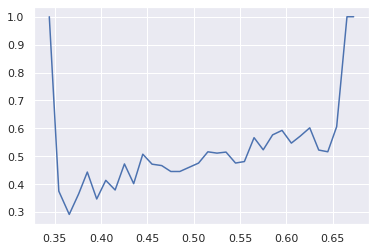

In [13]:
sns.set()
prob_true, prob_pred = calibration_curve(y_test, model.predict(X_test), n_bins=100)
plt.plot(prob_pred, prob_true)
plt.show()

In [14]:
print("Validation set:")
predicted_y = model.predict(X_val).reshape(-1,1)
target_y = y_val.to_numpy().reshape(-1,1)

transformed_predicted_y = Binarizer(threshold=0.5).fit_transform(predicted_y)

print(classification_report(target_y, transformed_predicted_y))
print("Confusion matrix:\n", confusion_matrix(target_y, transformed_predicted_y))

acc = accuracy_score(target_y, transformed_predicted_y)
print("Accuracy:", acc)

Validation set:
              precision    recall  f1-score   support

       False       0.53      0.46      0.50      3269
        True       0.54      0.61      0.57      3376

    accuracy                           0.54      6645
   macro avg       0.54      0.54      0.53      6645
weighted avg       0.54      0.54      0.53      6645

Confusion matrix:
 [[1515 1754]
 [1328 2048]]
Accuracy: 0.5361926260346125


In [15]:
print("Train set:")
predicted_y = model.predict(X_train).reshape(-1,1)
target_y = y_train.to_numpy().reshape(-1,1)

transformed_predicted_y = Binarizer(threshold=0.5).fit_transform(predicted_y)

print(classification_report(target_y, transformed_predicted_y))
print("Confusion matrix:\n", confusion_matrix(target_y, transformed_predicted_y))

acc = accuracy_score(target_y, transformed_predicted_y)
print("Accuracy:", acc)

Train set:
              precision    recall  f1-score   support

       False       0.58      0.50      0.54     12950
        True       0.58      0.65      0.61     13628

    accuracy                           0.58     26578
   macro avg       0.58      0.58      0.58     26578
weighted avg       0.58      0.58      0.58     26578

Confusion matrix:
 [[6509 6441]
 [4717 8911]]
Accuracy: 0.5801790954925126


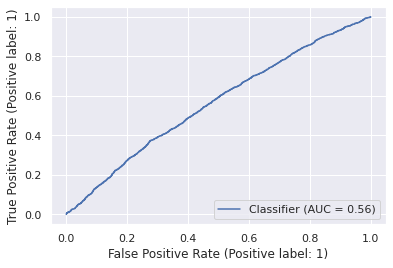

In [16]:
sns.set()
RocCurveDisplay.from_predictions(y_test, model.predict(X_test), pos_label=None);

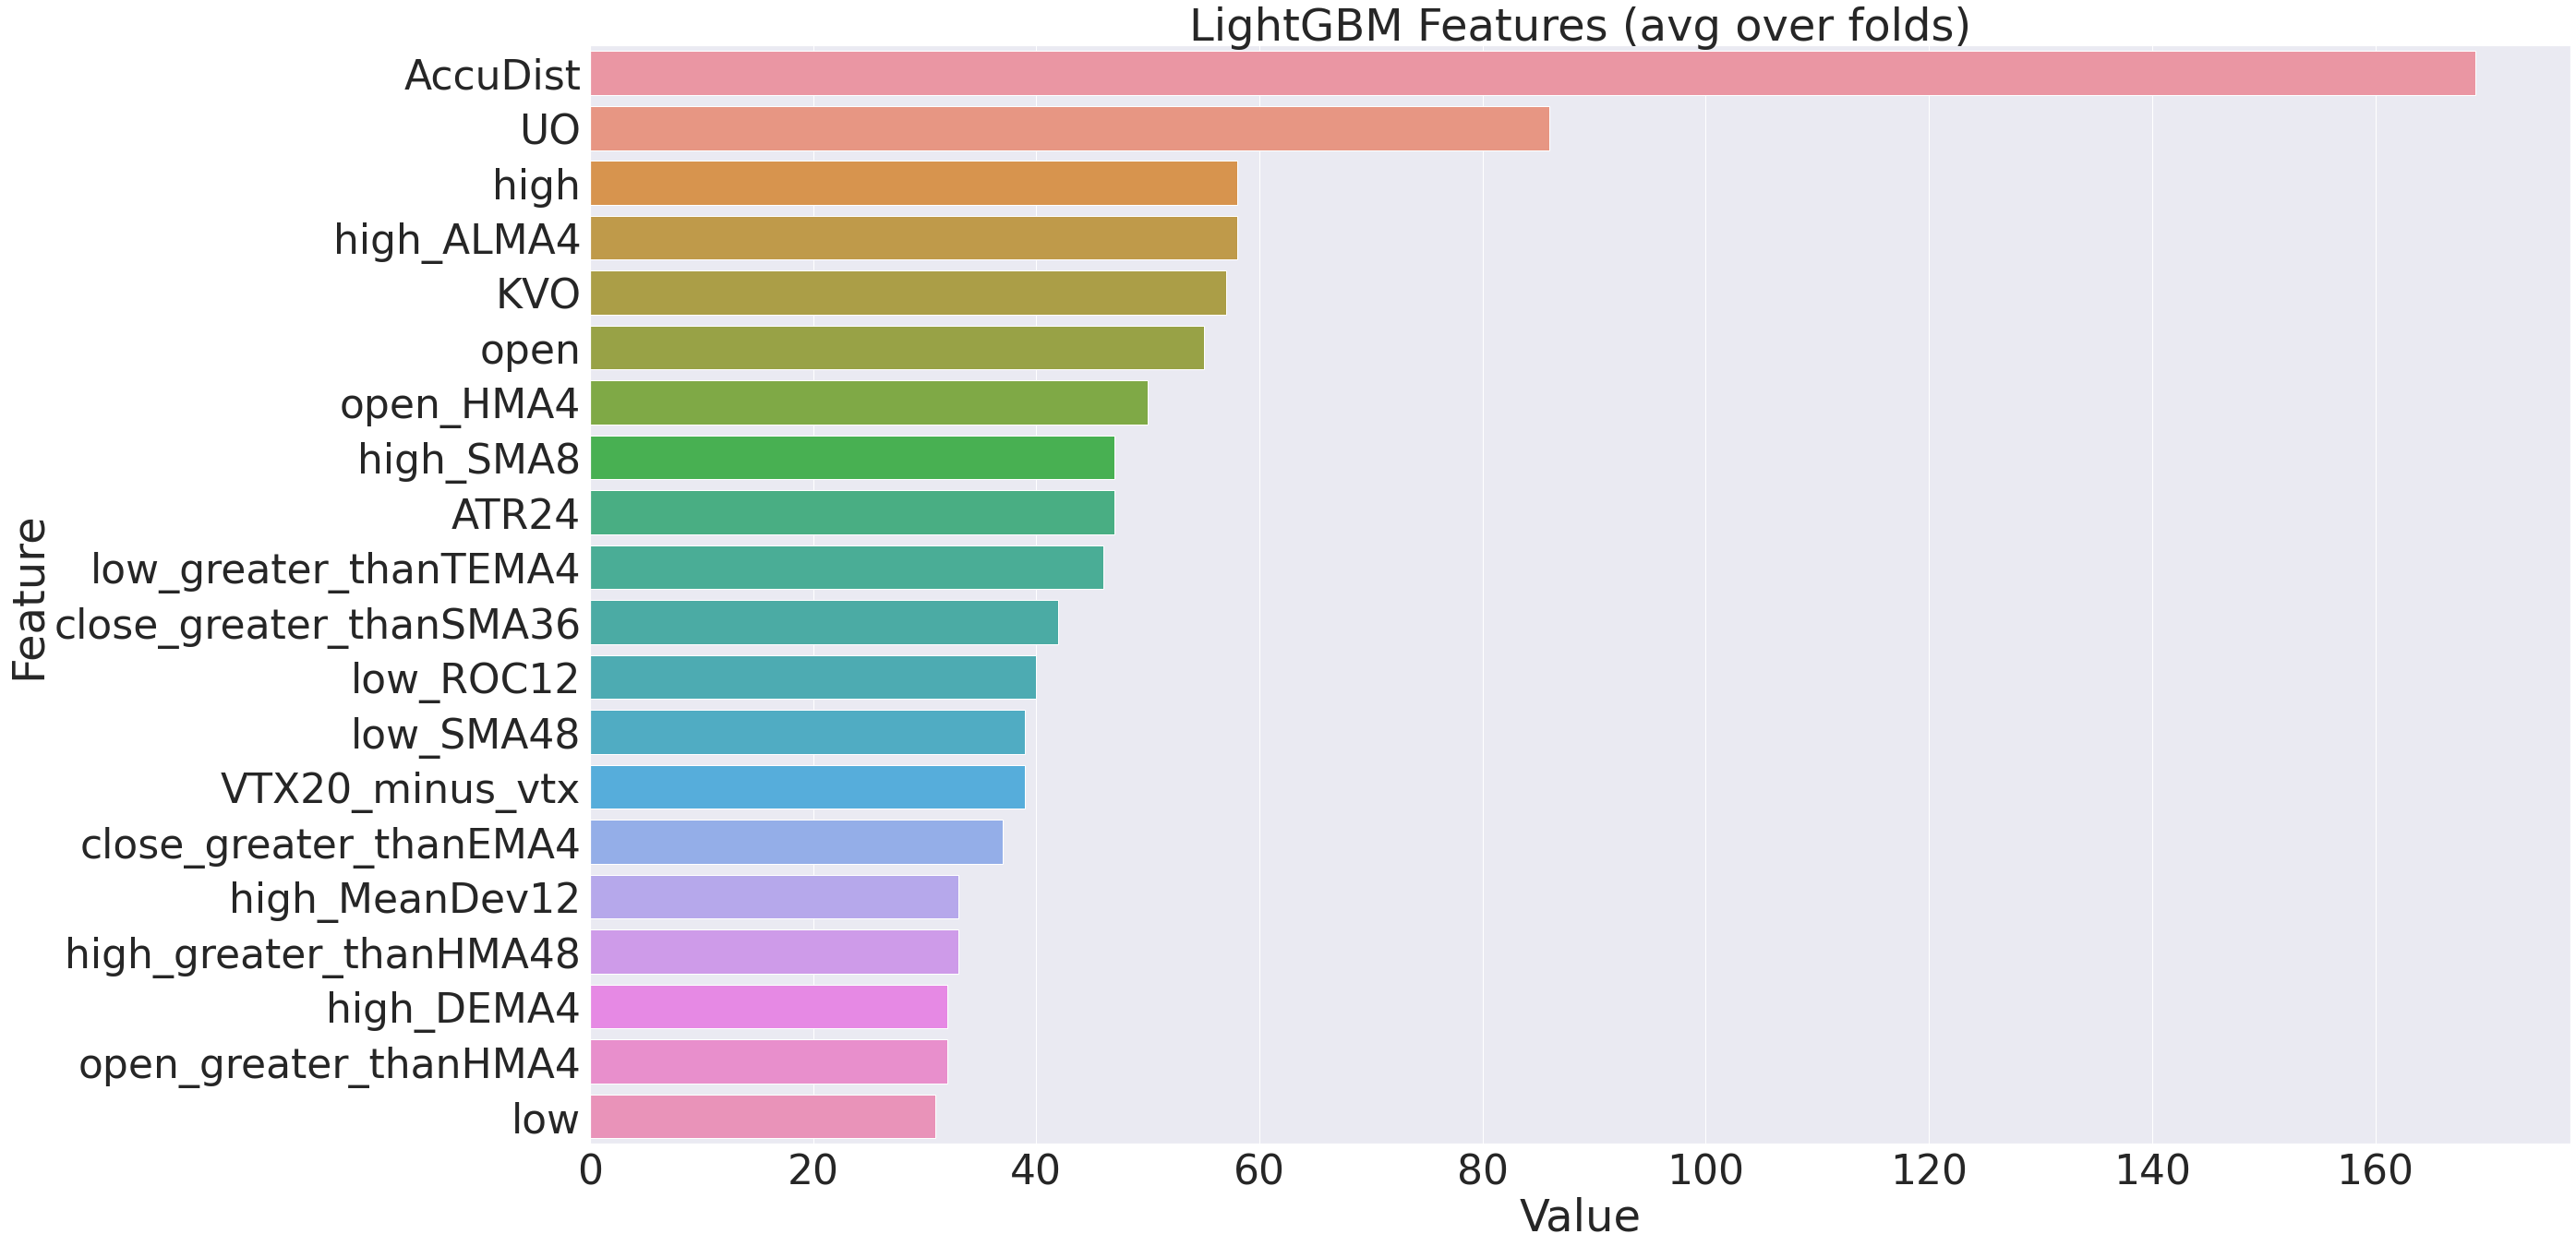

In [17]:
def plotImp(model, X , num = 20, fig_size = (40, 20)):
    feature_imp = pd.DataFrame({'Value':model.feature_importance(),'Feature':X.columns})
    plt.figure(figsize=fig_size)
    sns.set(font_scale = 4)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", 
                                                        ascending=False)[0:num])
    plt.title('LightGBM Features (avg over folds)')
    plt.tight_layout()
    plt.show()
    
plotImp(model, X_test)